In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sequence.runtime import Sequence
from units import unit_registry

from analyza.loading.importers import (
    array_as_float,
    break_namespaces,
    import_all,
    split_units,
)

from analyza.loading.dataframe_builder import build_dataframe_from_sequences

from analyza.functions.lorentzian import lorentzian
from analyza.fit import fit_to_data

In [14]:
sequences = [
    Sequence("2023.07_July.17.frequency_reference_3"),
    Sequence("2023.07_July.17.frequency_reference"),

]

title = "\n".join(str(sequence.path) for sequence in sequences)
mot_roi = (slice(34, 84), slice(34, 84))


data = build_dataframe_from_sequences(
    sequences,
    import_all | break_namespaces | split_units | array_as_float,
    show_progress=True,
)


data["Orca Quest.picture"] -= data["Orca Quest.background"]
data["fluo"] = data["Orca Quest.picture"].apply(
    lambda image: np.sum(image[mot_roi]) * 0.11
)

100%|██████████| 391/391 [00:06<00:00, 56.65it/s]


# Plot fluo vs frequency

In [27]:
fit_result = fit_to_data(
    data, lorentzian, x="red_frequency", y="fluo", p0=[-9.1, 0.07, 260, 220]
)
print(fit_result)

{'x0': -9.176519722251083, 'γ': 0.11389250488722176, 'A': 479.0684380251328, 'b': 312.67023816549954}


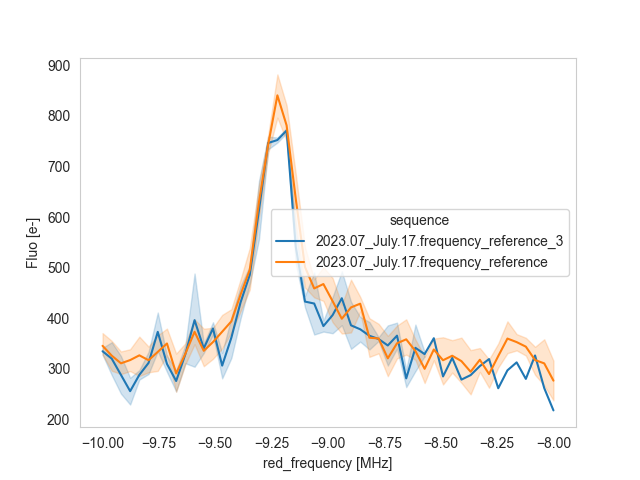

In [15]:
%matplotlib widget

var = "red_frequency"

hue = "sequence"

plt.figure()
sns.lineplot(data, x=var, y="fluo", hue=hue, legend="full")
plt.grid()

plt.ylabel("Fluo [e-]")

units = data[f"{var}.units"][0]
plt.xlabel(f"{var} [{unit_registry.get_symbol(str(units))}]")

x_tab = np.linspace(-10, -8, 500)
# plt.plot(x_tab, lorentzian(x_tab, **fit_result), ls = "--")